In [ ]:
## import packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/water_potability.csv')

In [ ]:
# check few observations
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Check the variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# Checking the number of unique values in each column
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [ ]:
## Check percent of missing
(df.isnull().sum() / df.shape[0])*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [ ]:
num_cols =df.columns
num_cols

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


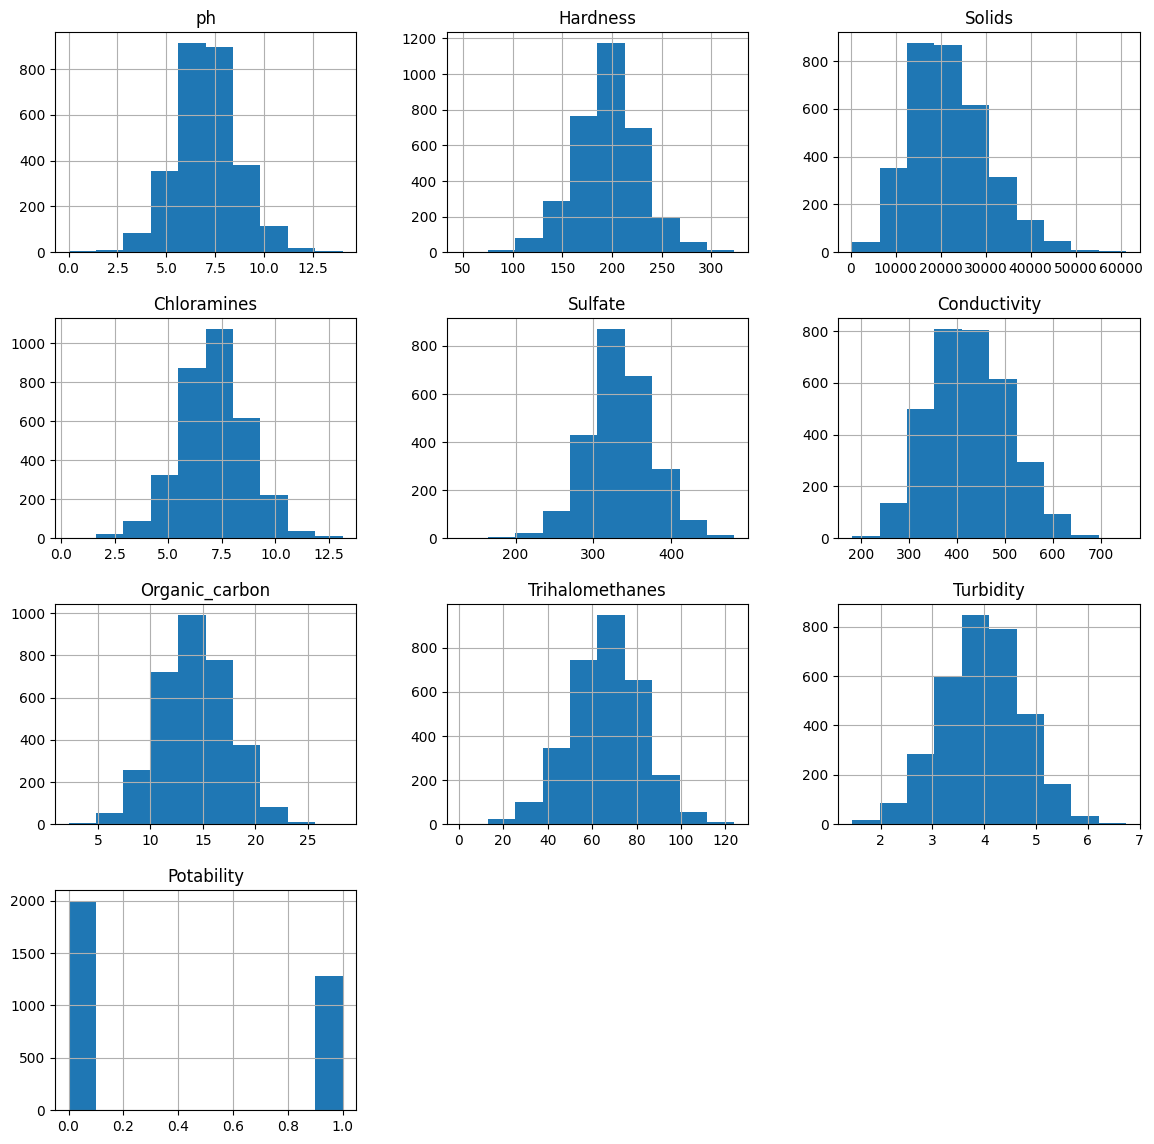

In [ ]:
# Creating histograms
df.hist(figsize = (14, 14))
plt.show()

In [ ]:
# The mean of numerical variables grouped by attrition
df.groupby(['Potability'])[num_cols].mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Potability,,,,,,,,,,
0,7.085378,196.733292,21777.490788,7.092175,334.56429,426.730454,14.364335,66.303555,3.965800,0.0
1,7.073783,195.800744,22383.991018,7.169338,332.56699,425.383800,14.160893,66.539684,3.968328,1.0


In [ ]:
# The median of numerical variables grouped by attrition
df.groupby(['Potability'])[num_cols].median()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Potability,,,,,,,,,,
0,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
1,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0


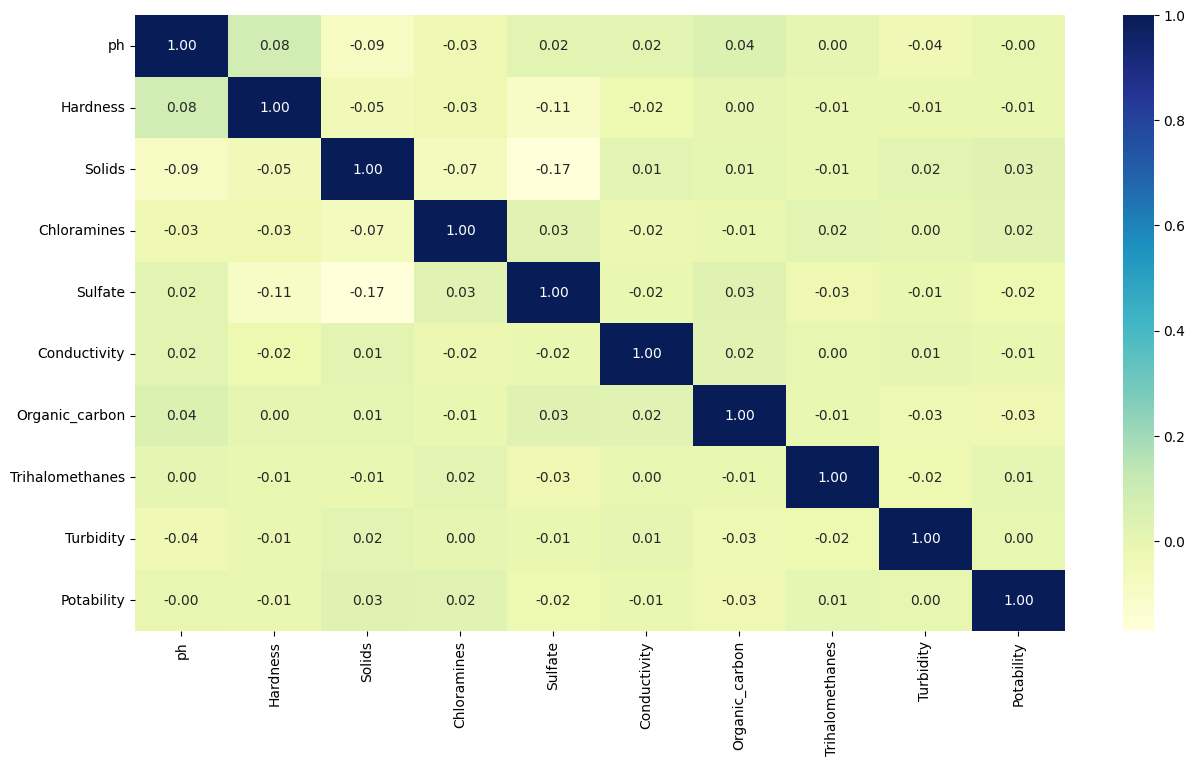

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize = (15, 8))
sns.heatmap(df[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu');

In [ ]:
# Input the missing values with the median of their respective columns
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [ ]:
# Check the variable types again and wheter the inputation worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#EDA Conclusion: After EDA and addressing the missing data, we see that distributions of the different variables have not been impacted drastically. Now we can proceed with modeling.

In [ ]:
# Separating the target variable and other variables
Y = df.Potability
X = df.drop(columns = ['Potability'])

In [ ]:
# Scaling the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [ ]:
# Splitting the data
## Splitting the data into 70% train and 30% test sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [ ]:
## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
## 2. Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
## 3. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
## 4. Support Vector Machine
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
## 5. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
## 6. Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [ ]:
## 7. Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_scaled, y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
# Placeholder for model predictions on the test set
# Replace `y_pred_model` with your actual predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_lda = lda_model.predict(X_test_scaled)
y_pred_qda = qda_model.predict(X_test_scaled)

# Dictionary to hold model names and their corresponding predictions
predictions = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'Support Vector Machine': y_pred_svm,
    'K-Nearest Neighbors': y_pred_knn,
    'Linear Discriminant Analysis': y_pred_lda,
    'Quadratic Discriminant Analysis': y_pred_qda
}

# Initialize an empty dictionary to store performance metrics
performance_metrics = {}

# Calculate performance metrics for each model and store them in the dictionary
for model_name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    performance_metrics[model_name] = [accuracy, precision, recall, f1]

# Create a DataFrame from the performance metrics dictionary
performance_df = pd.DataFrame(performance_metrics, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T

# Display the summary table
print(performance_df)

                                 Accuracy  Precision    Recall  F1 Score
Logistic Regression              0.610376   0.000000  0.000000  0.000000
Random Forest                    0.672431   0.664865  0.321149  0.433099
Gradient Boosting                0.658189   0.642424  0.276762  0.386861
Support Vector Machine           0.686673   0.773723  0.276762  0.407692
K-Nearest Neighbors              0.634791   0.539474  0.428198  0.477438
Linear Discriminant Analysis     0.610376   0.000000  0.000000  0.000000
Quadratic Discriminant Analysis  0.683622   0.700000  0.328982  0.447602


**Now we will perform some hyperparameter tuning.**     
***The codes have been commented out as they take long to run.***

In [ ]:
# Placeholder for model predictions on the test set
# Replace `y_pred_model` with your actual predictions
y_pred_lr2 = lr2_model.predict(X_test_scaled)
y_pred_rf2 = rf2_model.predict(X_test_scaled)
y_pred_gb2 = gb2_model.predict(X_test_scaled)
y_pred_svm2 = svm2_model.predict(X_test_scaled)
y_pred_knn2 = knn2_model.predict(X_test_scaled)
y_pred_lda2 = lda2_model.predict(X_test_scaled)
y_pred_qda2 = qda2_model.predict(X_test_scaled)

# Dictionary to hold model names and their corresponding predictions
predictions = {
    'Logistic Regression': y_pred_lr2,
    'Random Forest': y_pred_rf2,
    'Gradient Boosting': y_pred_gb2,
    'Support Vector Machine': y_pred_svm2,
    'K-Nearest Neighbors': y_pred_knn2,
    'Linear Discriminant Analysis': y_pred_lda2,
    'Quadratic Discriminant Analysis': y_pred_qda2
}

# Initialize an empty dictionary to store performance metrics
performance_metrics = {}

# Calculate performance metrics for each model and store them in the dictionary
for model_name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    performance_metrics[model_name] = [accuracy, precision, recall, f1]

# Create a DataFrame from the performance metrics dictionary
performance_df = pd.DataFrame(performance_metrics, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T

# Display the summary table
print(performance_df)

                                 Accuracy  Precision    Recall  F1 Score
Logistic Regression              0.610376   0.000000  0.000000  0.000000
Random Forest                    0.677518   0.685393  0.318538  0.434938
Gradient Boosting                0.668362   0.649215  0.323760  0.432056
Support Vector Machine           0.686673   0.773723  0.276762  0.407692
K-Nearest Neighbors              0.642930   0.565041  0.362924  0.441971
Linear Discriminant Analysis     0.610376   0.000000  0.000000  0.000000
Quadratic Discriminant Analysis  0.675483   0.695122  0.297650  0.416819


**CONCLUSION**    
-  In conclusion, we see that Hyperparameter Tuning have not resulted into a lot of improvement in the models.
-  In general, not a single model stood out to be the best.
-  Given the poor performances of the models, the data does not seem to be real.
